In [130]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [131]:
DATA_PATH   = '../input/airbus-ship-detection/'
TRAIN_PATH  = DATA_PATH+'train_v2/'
TEST_PATH   = DATA_PATH+'test_v2/' 

In [132]:
df = pd.read_csv(DATA_PATH+'train_ship_segmentations_v2.csv')
not_empty = pd.notna(df.EncodedPixels)
print(not_empty.sum(), 'masks in', df[not_empty].ImageId.nunique(), 'images')
print((~not_empty).sum(), 'empty images in', df.ImageId.nunique(), 'total images')
df.head()

81723 masks in 42556 images
150000 empty images in 192556 total images


,ImageId,EncodedPixels
0,00003e153.jpg,NaN
1,0001124c7.jpg,NaN
2,000155de5.jpg,264661 17 265429 33 266197 33 266965 33 267733...
3,000194a2d.jpg,360486 1 361252 4 362019 5 362785 8 363552 10 ...
4,000194a2d.jpg,51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...


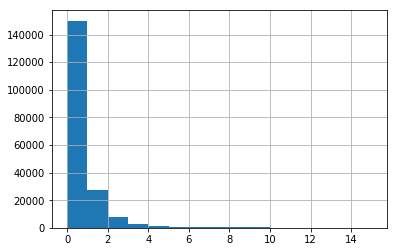

In [133]:
df['ships'] = df['EncodedPixels'].map(lambda c_row: 1 if isinstance(c_row, str) else 0)
unique_img_ids = df.groupby('ImageId').agg({'ships': 'sum'}).reset_index()
unique_img_ids['ships'].hist(bins=unique_img_ids['ships'].max())

16778 masks


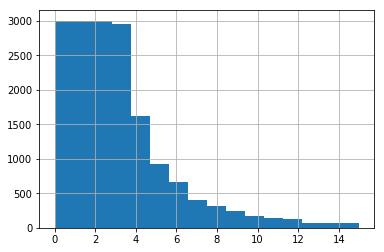

In [134]:
SAMPLES_PER_GROUP=3000
balanced_train_df = unique_img_ids.groupby('ships').apply(lambda x: x.sample(SAMPLES_PER_GROUP) if len(x) > SAMPLES_PER_GROUP else x)
balanced_train_df['ships'].hist(bins=balanced_train_df['ships'].max()+1)
df.drop(['ships'], axis=1, inplace=True)
print(balanced_train_df.shape[0], 'masks')

In [135]:
train_ids, valid_ids = train_test_split(balanced_train_df, 
                 test_size = 0.2, 
                 stratify = balanced_train_df['ships'])
train_df = pd.merge(df, train_ids)
valid_df = pd.merge(df, valid_ids)
print(train_df.shape[0], valid_df.shape[0])

41012 10259


In [ ]:
train_df.to_csv('/kaggle/working/train_df.csv',index=False)
valid_df.to_csv('/kaggle/working/valid_df.csv',index=False)